In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()
df_altered = df_altered[df_altered['job_title_short']=='Data Analyst']

In [5]:
# Create a new column for month number
df_altered['job_posted_month_no'] = df_altered['job_posted_date'].dt.month
# Explode the job_skills column and pivot
df_Data_explode = df_altered.explode('job_skills')
df_Data_pivot = df_Data_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
# sort the skills by count
df_Data_pivot.loc['Total'] = df_Data_pivot.sum() 
df_Data_pivot = df_Data_pivot[df_Data_pivot.loc['Total'].sort_values(ascending=False).index]
df_Data_pivot = df_Data_pivot.drop('Total')


In [7]:
# use month names for plotting
df_Data_pivot = df_Data_pivot.reset_index()
df_Data_pivot['job_posted_month'] = df_Data_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x , format='%m').strftime('%b'))
df_Data_pivot = df_Data_pivot.set_index('job_posted_month')
df_Data_pivot = df_Data_pivot.drop(columns='job_posted_month_no')


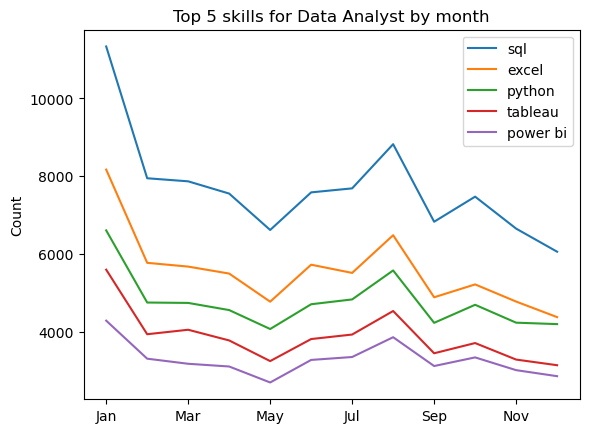

In [10]:
# get top 5 skills
df_Data_pivot.iloc[:, :5].plot(kind='line')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Top 5 skills for Data Analyst by month')
plt.legend()
plt.show()

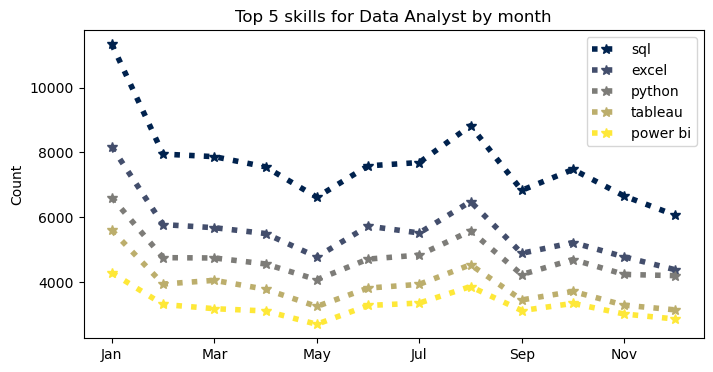

In [28]:
# more advanced plot
df_Data_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',# options '-', '--', '-.'. ':'
    colormap ='cividis', # options 'viridis', 'plasma', 'inferno', 'magma' and etc.
    marker= '*', # options 'o', 'x', '+', '*', 's', ',' , '.', '1', '2', '3','4' etc
    markersize = 7,
    figsize =(8,4)
    )
plt.xlabel('')
plt.ylabel('Count')
plt.title('Top 5 skills for Data Analyst by month')
plt.legend()
plt.show()